# Predicting Breast Cancer with Machine Learning

In [73]:
# Import the modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score ,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

### Loading and checking the data

In [74]:
# Load the dataset 
bc = load_breast_cancer()
data = pd.DataFrame(bc.data, columns=bc.feature_names)
data["diagnosis"] = bc.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [75]:
# Check for any missing value
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

### Features and target

In [76]:
# Define features (all columns except 'diagnosis') and target (column 'diagnosis')
X = data.iloc[:,:-1].values
y = data.diagnosis.values.reshape(-1,1)

### Logistic Regression or Decision Tree?

{'whiskers': [<matplotlib.lines.Line2D at 0x7f03dc489940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f03dc489c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f03dc489ca0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f03dbe74b80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f03dbee2700>,
 'means': []}

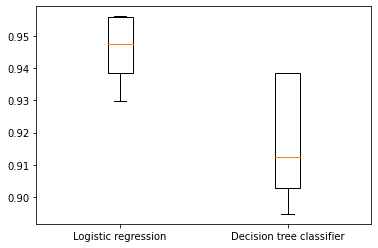

In [77]:
# Create a dictionary containing the models and an empty list
models = {"Logistic regression":LogisticRegression(), "Decision tree classifier":DecisionTreeClassifier()}
results = []

# Iterate over models
for model in models.values():
    
    # Cross validation scores
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Append the results to the empty list
    results.append(cv_scores)

# Make a boxplot out of the results
plt.boxplot(results, labels=models.keys())

### Model building

In [78]:
# Model to use
model = LogisticRegression()
# Scaler to use
scaler = StandardScaler()

In [79]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [80]:
# Scale features (target doesn't need to be scaled, since it's binary)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [81]:
# Fit the model
model.fit(X_train, y_train)
# Predict the target
y_pred = model.predict(X_test)
# Compute accuracy
model.score(X_test, y_test)

0.9766081871345029

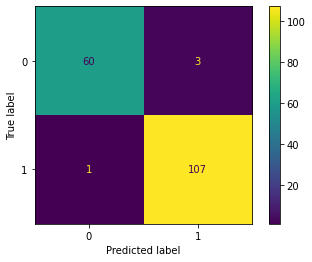

In [82]:
# Draw confusion matrix
plot_confusion_matrix(model, X_test, y_test)

### Model fine-tuning

In [83]:
# Parameters for logistic regression
params = {
    'penalty' : ['l1','l2'], 
    'C'       : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear']
}

# Cross-validation with parameters
searcher = GridSearchCV(model, param_grid = params, scoring = "accuracy", cv=5)

# Fit the searcher
searcher.fit(X_train, y_train)

# Best parameters and best score for the model
display(searcher.best_params_)
display(searcher.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

0.977373417721519

### Verify the tuned model

In [84]:
# Model with tuned parameters
model_tuned = LogisticRegression(C = 0.1, penalty="l2", solver="liblinear")

In [85]:
# Fit the model
model_tuned.fit(X_train, y_train)
# Predict the target
y_pred = model_tuned.predict(X_test)
# Compute accuracy
model_tuned.score(X_test, y_test)

0.9824561403508771

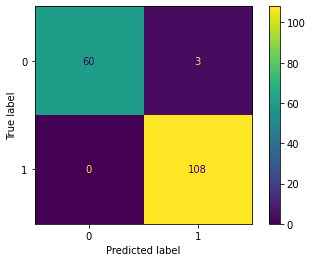

In [86]:
# Draw confusion matrix
plot_confusion_matrix(model_tuned, X_test, y_test)